## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install yfinance
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Creating the Dataset

In [2]:
data = yf.download(tickers = '^GSPC', end = '2022-09-01')
data.head()
# data['2006-01-03' :'2006-01-20']

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


<Axes: xlabel='Date'>

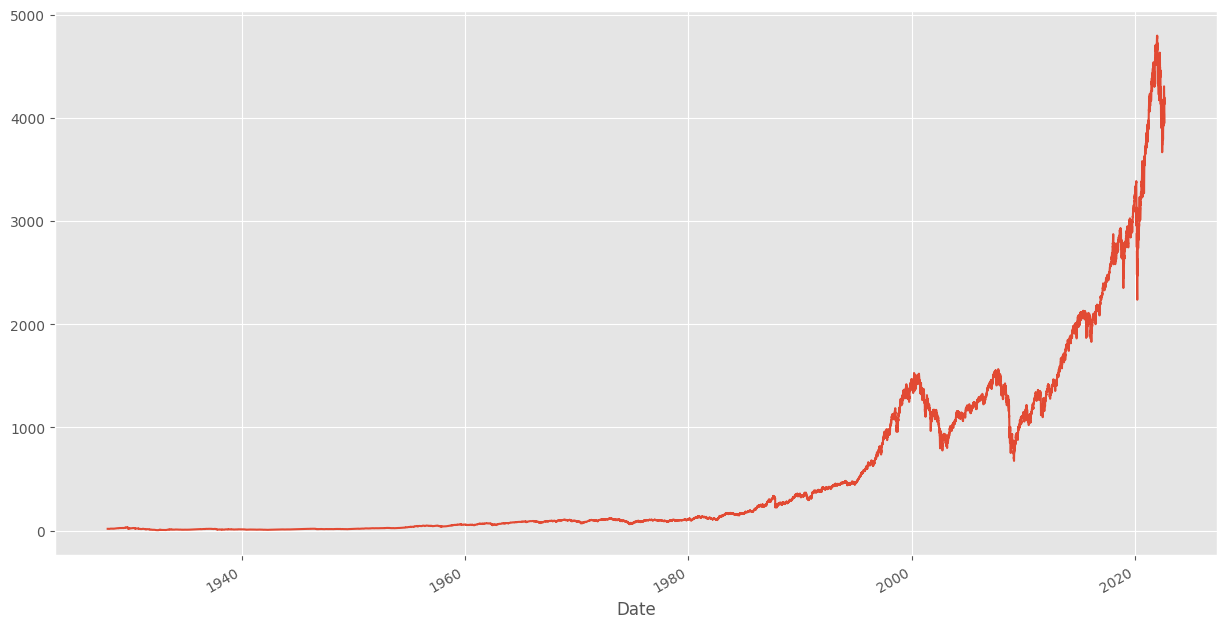

In [3]:
data['Close'].plot(figsize = (15,8))

In [4]:
data.shape

(23781, 6)

In [5]:
df= data.drop(['Open', 'High', 'Volume', 'Low', 'Adj Close'], axis = 1)
df.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [6]:
df.tail()

,Close
Date,
2022-08-25,4199.120117
2022-08-26,4057.659912
2022-08-29,4030.610107
2022-08-30,3986.159912
2022-08-31,3955.000000


In [7]:
df.shape

(23781, 1)

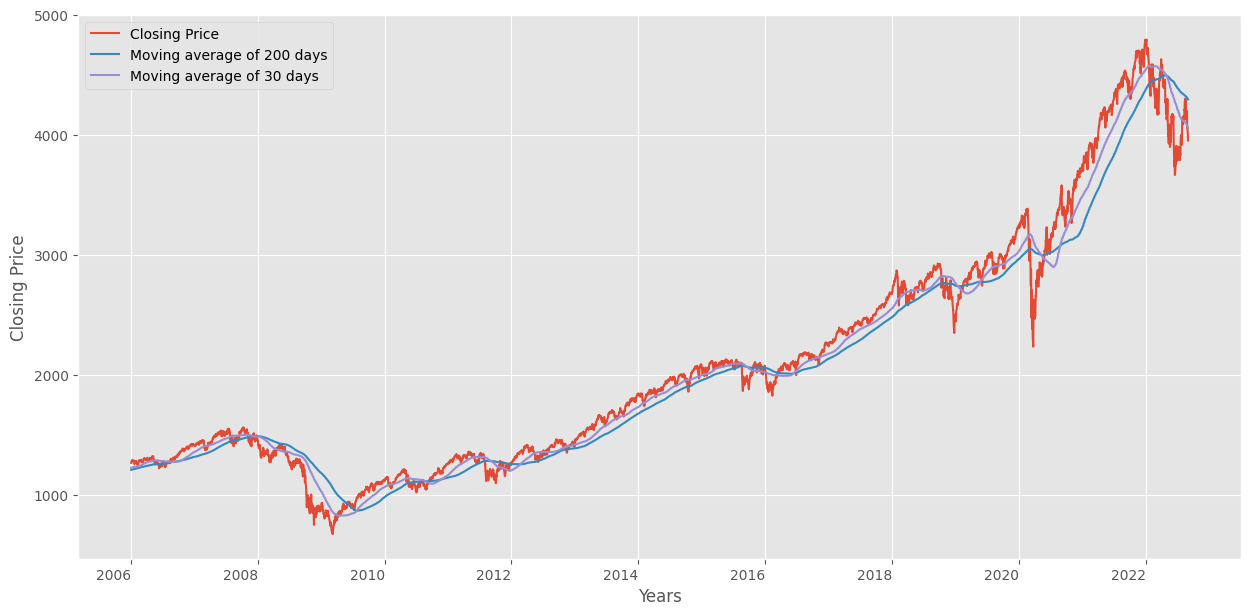

In [8]:
df_temp = df['2006-01-03':]
df_temp['MA30']=  df['Close'].rolling(window = 100).mean()
df_temp['MA200'] = df['Close'].rolling(window = 200).mean()

df_temp['Close'].plot(figsize = (15,8), label = 'Closing Price')
df_temp['MA200'].plot(label = 'Moving average of 200 days')
df_temp['MA30'].plot(label = 'Moving average of 30 days')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.xticks(rotation = 0 );
plt.legend()

<Axes: >

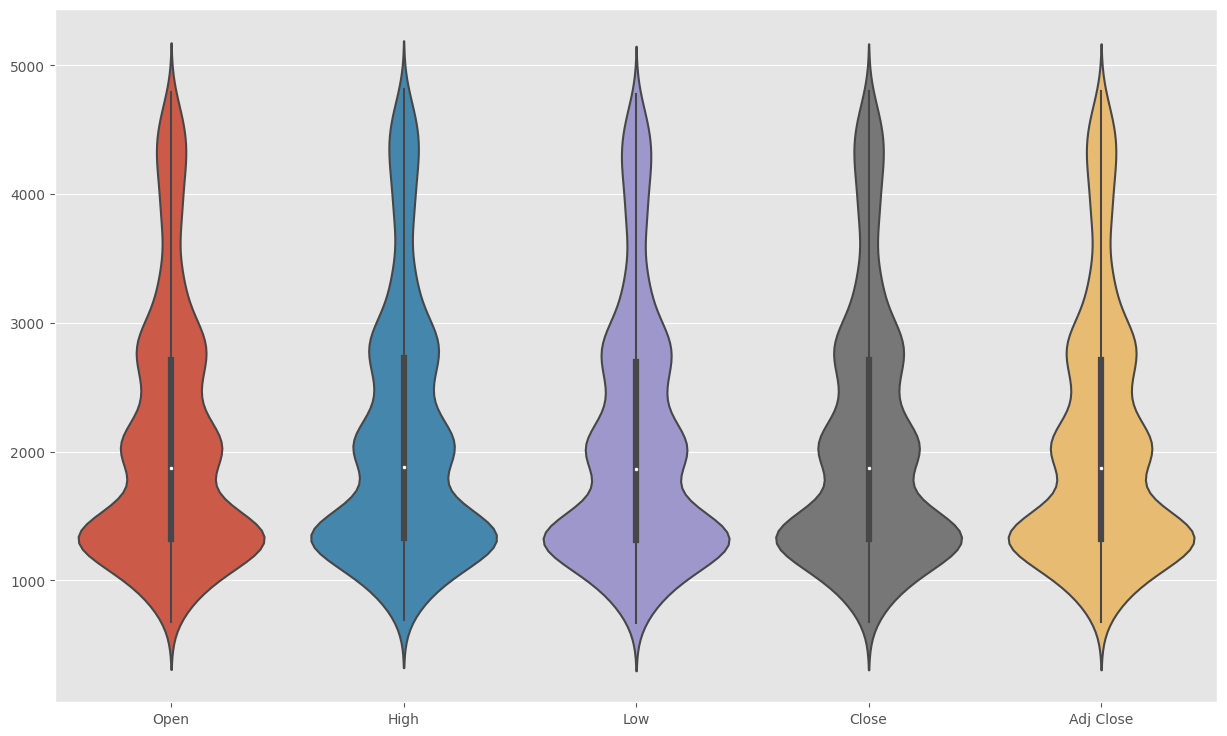

In [9]:
df_temp1 = data['2006-01-03':]
df_temp1.drop(columns = ['Volume'], inplace = True)
plt.figure(figsize = (15,9))
sns.violinplot(data = df_temp1)

### Adding Technical Indicators

In [10]:
# Adding indicators
df['RSI']=ta.rsi(df.Close, length=15)


df['EMA12']=ta.ema(df.Close, length=12)
df['EMA26']=ta.ema(df.Close, length=26)
df['MACD'] = df['EMA12'] - df['EMA26']
df.drop(['EMA12', 'EMA26'], axis = 1, inplace = True)

df['ROC'] = ta.roc(df.Close, length=10)
df['ATR'] = ta.atr(data.High,data.Low,data.Close)


#Changing the index to being from 2006
# df = df.loc['2006-01-03':]
df = df['2006-01-03':]


df.dropna(inplace = True)



### Adding Economic indicator USDX

In [11]:
df.reset_index(inplace = True)
df.head()

,Date,Close,RSI,MACD,ROC,ATR
0,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469
1,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936
2,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582
3,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182
4,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390


In [12]:
df_USDX = pd.read_csv('USDX.csv', parse_dates= ['Date'], dayfirst = True)
df_USDX.dropna(inplace=True)
df_USDX.reset_index(inplace = True,drop=True)
df_USDX.drop(['Open','High', 'Low','Adj Close', 'Volume'], axis = 1, inplace = True)
df_USDX.head()
df_USDX.tail()
# df_USDX.shape



,Date,Close
4190,2022-08-25,108.470001
4191,2022-08-26,108.800003
4192,2022-08-29,108.839996
4193,2022-08-30,108.769997
4194,2022-08-31,108.699997


<!-- It can be observed that 4 rows are excess in USDX or rather missing in S&P 500 -->

In [13]:
df_USDX.shape

(4195, 2)

In [14]:
# import datetime 
# df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
df_USDX['Date'] = pd.to_datetime(df_USDX['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Date,Close,RSI,MACD,ROC,ATR
0,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469
1,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936
2,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582
3,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182
4,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390
...,...,...,...,...,...,...
4190,2022-08-25,4199.120117,57.020390,50.488847,-0.193710,59.883975
4191,2022-08-26,4057.659912,44.772557,36.408150,-5.198182,65.990843
4192,2022-08-29,4030.610107,42.885302,22.803538,-6.202498,64.532216
4193,2022-08-30,3986.159912,39.922459,8.338900,-7.410580,65.620631


In [15]:
df_USDX['Date'][0]

datetime.date(2006, 1, 3)

In [16]:
df_USDX['check'] = ~df_USDX['Date'].isin(df['Date'])
missing = df_USDX[df_USDX['check'] == True]
missing


,Date,Close,check


In [17]:
df_USDX.sort_index().reset_index(inplace= True, drop = True)

In [18]:
df.shape

(4195, 6)

In [19]:
df_USDX.shape

(4195, 3)

In [20]:
df['check'] = ~df['Date'].isin(df_USDX['Date'])         
missing2 = df[df['check'] == True] 
missing2


,Date,Close,RSI,MACD,ROC,ATR,check


In [21]:
(df['Date'] == df_USDX['Date']).value_counts()

True    4195
Name: Date, dtype: int64

In [22]:
df['USDX'] = df_USDX['Close']
df.drop('check', inplace = True, axis = 1)
df.head()

,Date,Close,RSI,MACD,ROC,ATR,USDX
0,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469,89.839996
1,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936,89.139999
2,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582,89.330002
3,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182,88.849998
4,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390,89.250000


### Adding Economic indicator VIX

In [23]:
df_VIX = pd.read_csv('VIX_History.csv', parse_dates= ['DATE'], dayfirst =False)
df_VIX.dropna(inplace=True)
df_VIX.reset_index(inplace = True,drop=True)
df_VIX.head()
# df_USDX.tail()
# df_USDX.shape



,DATE,CLOSE
0,2006-01-03,11.14
1,2006-01-04,11.37
2,2006-01-05,11.31
3,2006-01-06,11.00
4,2006-01-09,11.13


It can be observed that 4 rows are excess in USDX or rather missing in S&P 500

In [24]:
df_VIX.shape

(4195, 2)

In [25]:
# import datetime 
# df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
df_VIX['DATE'] = pd.to_datetime(df_VIX['DATE']).dt.date

In [26]:
df_VIX['DATE'][0]

datetime.date(2006, 1, 3)

In [27]:
df_VIX['check'] = ~df_VIX['DATE'].isin(df['Date'])
missing = df_VIX[df_VIX['check'] == True]
missing


,DATE,CLOSE,check


In [28]:
df.shape

(4195, 7)

In [29]:
df_VIX.shape

(4195, 3)

In [30]:
df['check'] = ~df['Date'].isin(df_VIX['DATE'])         
missing2 = df[df['check'] == True] 
missing2


,Date,Close,RSI,MACD,ROC,ATR,USDX,check


In [31]:
(df['Date'] ==df_VIX['DATE']).value_counts()

True    4195
dtype: int64

In [32]:
df['VIX'] = df_VIX['CLOSE']
df.drop('check', inplace = True, axis = 1)
df.head()

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX
0,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469,89.839996,11.14
1,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936,89.139999,11.37
2,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582,89.330002,11.31
3,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182,88.849998,11.00
4,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390,89.250000,11.13


## Correlation Plot with all features

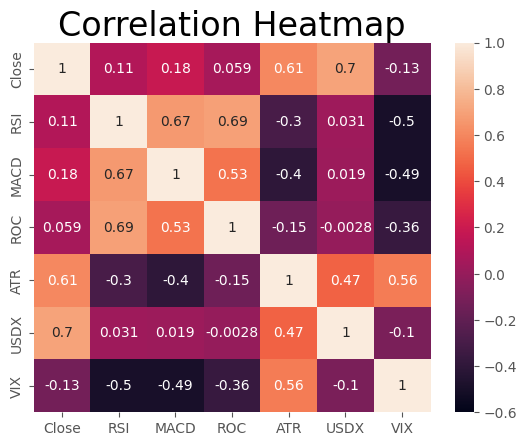

<Figure size 2400x1600 with 0 Axes>

In [33]:
#Correlation heatmap

heatmap = sns.heatmap(df.corr(),vmin=-0.6, vmax=1, annot=True);
plt.figure(figsize=(24,16))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=1);
plt.show()

## Adding Target variable

In [34]:
df['TargetNextClose'] = df['Close'].shift(-1)
df.head(20)

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
0,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469,89.839996,11.14,1273.459961
1,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936,89.139999,11.37,1273.479980
2,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582,89.330002,11.31,1285.449951
3,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182,88.849998,11.00,1290.150024
4,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390,89.250000,11.13,1289.689941
5,2006-01-10,1289.689941,67.372594,8.563704,1.657647,9.307934,89.330002,10.86,1294.180054
6,2006-01-11,1294.180054,69.214703,9.551121,2.995528,9.127370,88.989998,10.94,1286.060059
7,2006-01-12,1286.060059,62.389634,9.568145,2.216713,9.128273,89.440002,11.20,1287.609985
8,2006-01-13,1287.609985,63.133105,9.596085,2.645840,8.917677,88.889999,11.23,1282.930054
9,2006-01-17,1282.930054,59.338353,9.135290,2.774997,8.923557,89.300003,11.91,1277.930054


In [35]:
# df.dropna(inplace = True)
df.tail()

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
4190,2022-08-25,4199.120117,57.020390,50.488847,-0.193710,59.883975,108.470001,21.78,4057.659912
4191,2022-08-26,4057.659912,44.772557,36.408150,-5.198182,65.990843,108.800003,25.56,4030.610107
4192,2022-08-29,4030.610107,42.885302,22.803538,-6.202498,64.532216,108.839996,26.21,3986.159912
4193,2022-08-30,3986.159912,39.922459,8.338900,-7.410580,65.620631,108.769997,26.21,3955.000000
4194,2022-08-31,3955.000000,37.953063,-5.574515,-7.464601,65.279164,108.699997,25.87,NaN


In [36]:
df_temp = yf.download('^GSPC', start = '2022-09-01', end = '2022-09-02') 
# df.iloc[4194]['TargetNextClose'] = df_temp['Close'][0]
df_temp.head()
Value = df_temp.Close[0]
Value

[*********************100%***********************]  1 of 1 completed


3966.85009765625

In [37]:
df['TargetNextClose'][4194] = Value

df.tail()

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
4190,2022-08-25,4199.120117,57.020390,50.488847,-0.193710,59.883975,108.470001,21.78,4057.659912
4191,2022-08-26,4057.659912,44.772557,36.408150,-5.198182,65.990843,108.800003,25.56,4030.610107
4192,2022-08-29,4030.610107,42.885302,22.803538,-6.202498,64.532216,108.839996,26.21,3986.159912
4193,2022-08-30,3986.159912,39.922459,8.338900,-7.410580,65.620631,108.769997,26.21,3955.000000
4194,2022-08-31,3955.000000,37.953063,-5.574515,-7.464601,65.279164,108.699997,25.87,3966.850098


In [38]:
df.to_csv('Final dataset.csv')

## Scaling the dataset

In [39]:
df_s = df.copy()
df_s.drop('Date', inplace = True, axis = 1)
df_s

,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
0,1268.800049,58.143635,3.663489,0.116790,9.989469,89.839996,11.14,1273.459961
1,1273.459961,60.416899,4.422390,1.074665,9.820936,89.139999,11.37,1273.479980
2,1273.479980,60.426792,4.968170,1.100331,9.591582,89.330002,11.31,1285.449951
3,1285.449951,65.888435,6.294028,1.794432,9.807182,88.849998,11.00,1290.150024
4,1290.150024,67.760354,7.636013,1.737220,9.532390,89.250000,11.13,1289.689941
...,...,...,...,...,...,...,...,...
4190,4199.120117,57.020390,50.488847,-0.193710,59.883975,108.470001,21.78,4057.659912
4191,4057.659912,44.772557,36.408150,-5.198182,65.990843,108.800003,25.56,4030.610107
4192,4030.610107,42.885302,22.803538,-6.202498,64.532216,108.839996,26.21,3986.159912
4193,3986.159912,39.922459,8.338900,-7.410580,65.620631,108.769997,26.21,3955.000000


In [40]:
X = df_s.drop('TargetNextClose', axis = 1)
y = pd.DataFrame(df_s['TargetNextClose'])
print('X:', X.head())
print('y:', y.head())

X:          Close        RSI      MACD       ROC       ATR       USDX    VIX
0  1268.800049  58.143635  3.663489  0.116790  9.989469  89.839996  11.14
1  1273.459961  60.416899  4.422390  1.074665  9.820936  89.139999  11.37
2  1273.479980  60.426792  4.968170  1.100331  9.591582  89.330002  11.31
3  1285.449951  65.888435  6.294028  1.794432  9.807182  88.849998  11.00
4  1290.150024  67.760354  7.636013  1.737220  9.532390  89.250000  11.13
y:    TargetNextClose
0      1273.459961
1      1273.479980
2      1285.449951
3      1290.150024
4      1289.689941


In [41]:
from sklearn.preprocessing import MinMaxScaler
import math
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)



## Sequencing the Dataset for LSTM

In [42]:
backcandles = 100
X_seq = []
y_seq = []

def create_seq(X, backcandles = 30):
  X_seq = []
  y_seq = []
  for i in range(backcandles, len(X)):
    X_seq.append(X_scaled[i - backcandles:i, 0:X_scaled.shape[1]])
    y_seq.append(X_scaled[i :i+1, 0])

  X_seq = np.array(X_seq)
  X_seq.shape
  y_seq = np.array(y_seq)
  y_seq.shape
  print('The shapes of the features and labels are ',X_seq.shape,y_seq.shape )

  return X_seq, y_seq

X_seq, y_seq = create_seq(X, backcandles)

The shapes of the features and labels are  (4095, 100, 7) (4095, 1)


In [43]:
X_seq[0][0]

array([0.14375381, 0.59147592, 0.730221  , 0.54713327, 0.00977145,
       0.49072093, 0.02719239])

## Train - test split

In [44]:
train_len = math.ceil(0.8*(X_seq.shape[0]))

x_train, x_test = X_seq[:train_len], X_seq[train_len:]
print(x_train.shape, x_test.shape)
# x_test = X_scaled[train_len:]

(3276, 100, 7) (819, 100, 7)


In [45]:
y_train, y_test = y_seq[:train_len], y_seq[train_len:]
print(y_train.shape, y_test.shape)

(3276, 1) (819, 1)


## LSTM Model

In [47]:
from keras.models import Sequential

import tensorflow as tf
import keras
from keras import optimizers
# from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation
import numpy as np

np.random.seed(47)

model=Sequential()
model.add(LSTM(150,input_shape=(x_train.shape[1],x_train.shape[2])))

model.add(Dense(1))
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005, decay=1e-6)
model.compile(loss='mse',optimizer=opt)




In [48]:
history = model.fit(x=x_train, y=y_train, batch_size=15, shuffle= True, epochs=50, validation_split = 0.2)

Epoch 1/50
175/175 [==============================] - 14s 73ms/step - loss: 0.0017 - val_loss: 1.3324e-04
Epoch 2/50
175/175 [==============================] - 12s 71ms/step - loss: 4.9401e-05 - val_loss: 3.0988e-04
Epoch 3/50
175/175 [==============================] - 13s 72ms/step - loss: 4.6052e-05 - val_loss: 5.8625e-04
Epoch 4/50
175/175 [==============================] - 12s 70ms/step - loss: 4.0545e-05 - val_loss: 1.9669e-04
Epoch 5/50
175/175 [==============================] - 12s 71ms/step - loss: 4.1079e-05 - val_loss: 9.9466e-05
Epoch 6/50
175/175 [==============================] - 12s 70ms/step - loss: 4.7805e-05 - val_loss: 1.0819e-04
Epoch 7/50
175/175 [==============================] - 12s 70ms/step - loss: 3.0794e-05 - val_loss: 1.2458e-04
Epoch 8/50
175/175 [==============================] - 13s 72ms/step - loss: 4.5596e-05 - val_loss: 1.0144e-04
Epoch 9/50
175/175 [==============================] - 12s 71ms/step - loss: 3.5202e-05 - val_loss: 1.2122e-04
Epoch 10/50
17

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               94800     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 94,951
Trainable params: 94,951
Non-trainable params: 0
_________________________________________________________________


## Predicting the test values

In [50]:
y_pred = model.predict(x_test)


26/26 [==============================] - 1s 32ms/step


In [51]:
y_pred.shape

(819, 1)

In [52]:
y_pred_copies = np.repeat(y_pred, x_train.shape[2], axis = 1)
y_pred_copies = scaler.inverse_transform(y_pred_copies)
y_pred = y_pred_copies[:,0]
print(y_pred)


[2757.9463 2798.8472 2820.854  2836.0178 2857.5964 2872.3914 2879.5847
 2881.7983 2892.0354 2897.6165 2903.6833 2919.7302 2931.4087 2948.8428
 2951.2346 2951.1006 2931.3074 2927.5322 2936.0515 2951.9258 2970.622
 2981.634  2996.3938 2994.0444 2983.4475 2986.0598 3001.3516 3011.9119
 3024.4663 3027.5703 3018.2969 2998.707  3003.3296 2989.7134 2997.145
 3014.125  3027.2776 3015.7903 3026.7783 3025.0461 3018.3413 2989.9646
 2963.223  2946.7158 2880.7256 2894.8406 2894.55   2930.8186 2922.4292
 2891.7327 2913.3777 2866.1768 2856.8296 2880.7515 2912.7437 2907.564
 2921.4966 2919.595  2877.3354 2882.9392 2874.9683 2889.8792 2915.8538
 2920.4016 2909.5813 2930.7168 2957.2483 2972.458  2983.8208 2988.8643
 3004.8467 3016.4326 3019.9116 3014.1772 3021.1196 3023.9622 3023.4885
 3010.0945 3008.2976 2985.7405 2993.2495 2989.053  2974.68   2983.7917
 2955.6404 2912.9255 2918.3271 2948.8394 2945.3237 2913.2458 2920.6516
 2934.2664 2960.2617 2965.6816 2987.2192 2994.0374 3001.363  2995.0925
 3007.994

In [53]:
y_pred.shape

(819,)

In [54]:
print(y_pred_copies)

[[2757.9463     52.219837  -70.50615  ...   81.41748    90.38593
    46.29705 ]
 [2798.8472     52.901413  -67.23406  ...   82.84876    90.7604
    47.027203]
 [2820.854      53.26814   -65.47352  ...   83.61886    90.96187
    47.420063]
 ...
 [4122.1885     74.95372    38.63374  ...  129.1576    102.87595
    70.651245]
 [4079.035      74.234604   35.18142  ...  127.647484  102.480865
    69.880875]
 [4036.5771     73.52709    31.784798 ...  126.16173   102.092155
    69.122925]]


In [55]:
Output = df.iloc[train_len + backcandles:]
Output.head()

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
3376,2019-06-04,2803.270020,44.055952,-28.942970,-1.301302,35.493819,97.070000,16.97,2826.149902
3377,2019-06-05,2826.149902,48.181050,-25.162945,-1.333987,34.841411,97.370003,16.09,2843.489990
3378,2019-06-06,2843.489990,51.108404,-20.531374,-0.447438,34.470606,97.029999,15.93,2873.340088
3379,2019-06-07,2873.340088,55.721930,-14.287471,1.810622,34.971276,96.610001,16.30,2886.729980
3380,2019-06-10,2886.729980,57.642896,-8.164564,2.146802,34.718323,96.760002,15.94,2885.719971


In [56]:
df.index = pd.DatetimeIndex((df['Date']))
df_train = df[backcandles:-1 * (x_test.shape[0])]
df.head()

,Date,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose
Date,,,,,,,,,
2006-01-03,2006-01-03,1268.800049,58.143635,3.663489,0.116790,9.989469,89.839996,11.14,1273.459961
2006-01-04,2006-01-04,1273.459961,60.416899,4.422390,1.074665,9.820936,89.139999,11.37,1273.479980
2006-01-05,2006-01-05,1273.479980,60.426792,4.968170,1.100331,9.591582,89.330002,11.31,1285.449951
2006-01-06,2006-01-06,1285.449951,65.888435,6.294028,1.794432,9.807182,88.849998,11.00,1290.150024
2006-01-09,2006-01-09,1290.150024,67.760354,7.636013,1.737220,9.532390,89.250000,11.13,1289.689941


In [57]:
x_train_pred_copies = np.repeat(model.predict(x_train), x_train.shape[2], axis = 1)
x_train_pred_copies = scaler.inverse_transform(x_train_pred_copies)
x_train_pred = x_train_pred_copies[:,0]
# print(x_train_pred)


df_train['Predictions'] = x_train_pred

103/103 [==============================] - 3s 30ms/step


## Final test dataset with predictions

In [58]:
Output['Predictions'] = y_pred
Output.set_index(['Date'], inplace = True)
Output.head()

,Close,RSI,MACD,ROC,ATR,USDX,VIX,TargetNextClose,Predictions
Date,,,,,,,,,
2019-06-04,2803.270020,44.055952,-28.942970,-1.301302,35.493819,97.070000,16.97,2826.149902,2757.946289
2019-06-05,2826.149902,48.181050,-25.162945,-1.333987,34.841411,97.370003,16.09,2843.489990,2798.847168
2019-06-06,2843.489990,51.108404,-20.531374,-0.447438,34.470606,97.029999,15.93,2873.340088,2820.854004
2019-06-07,2873.340088,55.721930,-14.287471,1.810622,34.971276,96.610001,16.30,2886.729980,2836.017822
2019-06-10,2886.729980,57.642896,-8.164564,2.146802,34.718323,96.760002,15.94,2885.719971,2857.596436


## Metrics

In [59]:
import pickle
pickle.dump(model, open('model_with final.hdf5', 'wb'))

In [60]:
df.index = pd.DatetimeIndex((df['Date']))
df_train = df[backcandles:-1 * (x_test.shape[0])]
df.head()


x_train_pred_copies = np.repeat(model.predict(x_train), x_train.shape[2], axis = 1)
x_train_pred_copies = scaler.inverse_transform(x_train_pred_copies)
x_train_pred = x_train_pred_copies[:,0]
# print(x_train_pred)


df_train['Predictions'] = x_train_pred

103/103 [==============================] - 3s 33ms/step


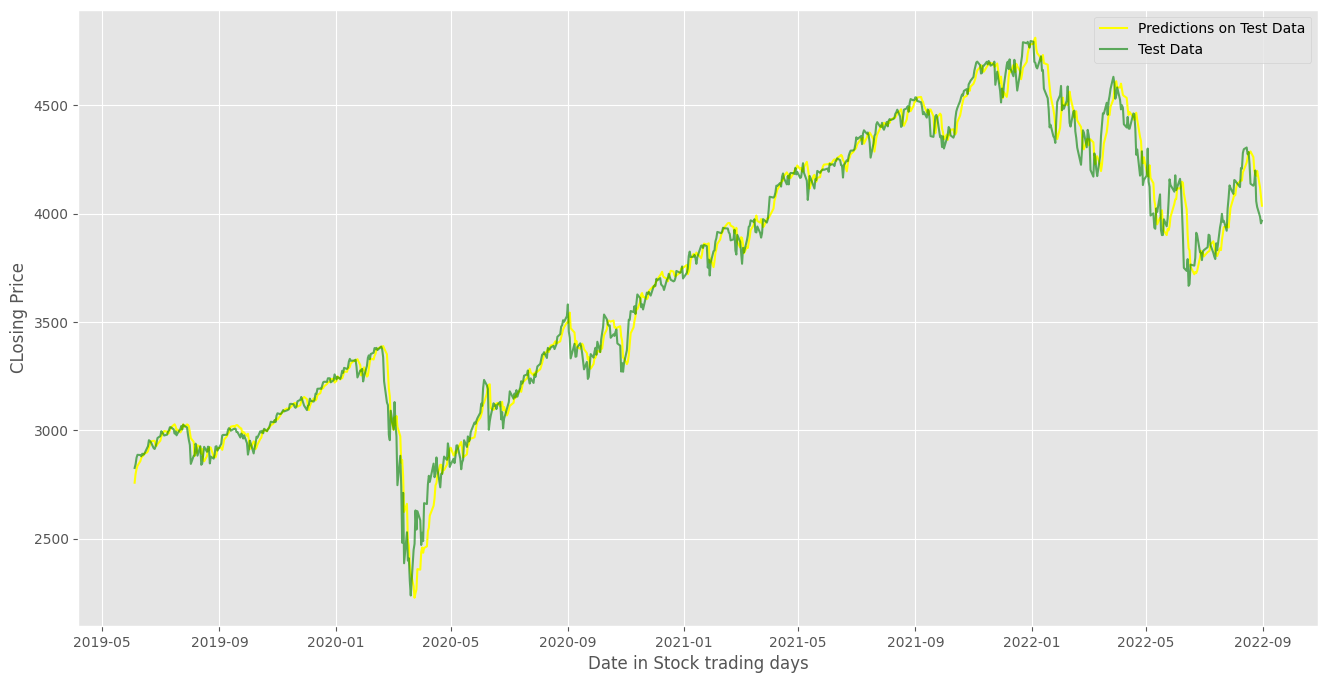

In [61]:
plt.figure(figsize=(16,8))

Output['Predictions'].plot(color = 'yellow', label = 'Predictions on Test Data')
Output['TargetNextClose'].plot(color = 'green', label = 'Test Data', alpha=0.6)
# plt.xticks(Output['Date'])
plt.xticks(rotation = 0)
plt.xlabel('Date in Stock trading days')
plt.ylabel('CLosing Price')
# plt.figure(figsize = (24,20))
plt.legend()
plt.show()

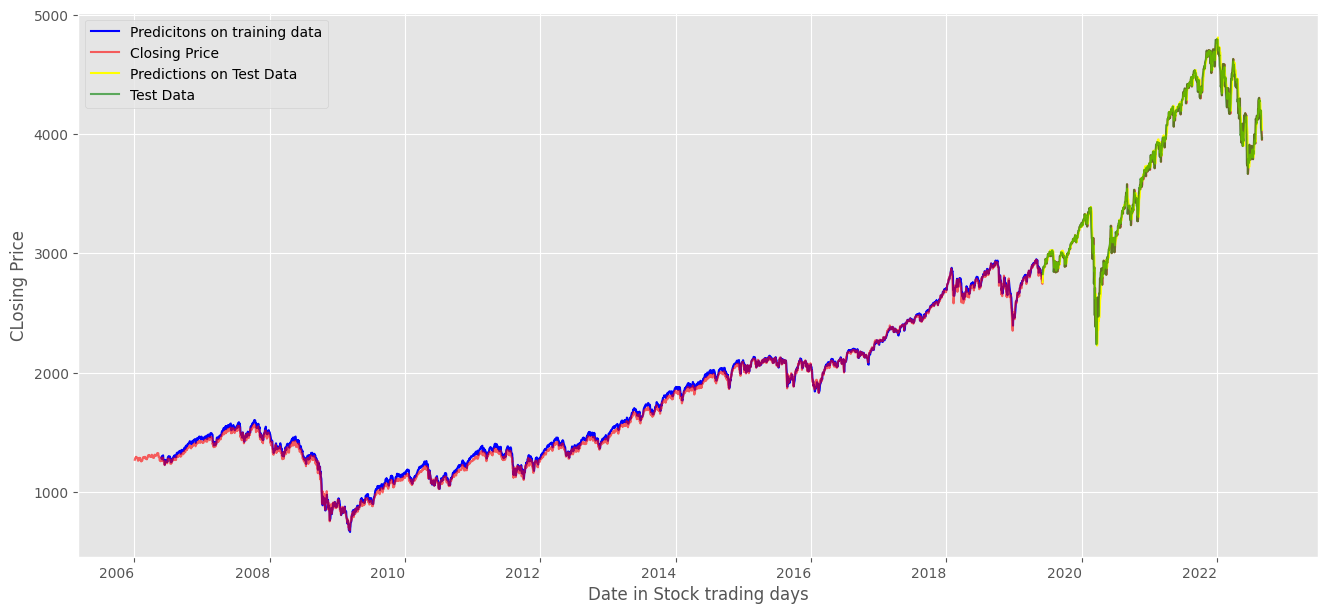

In [62]:
plt.figure(figsize=(16,8))
df_train['Predictions'].plot(label = 'Predicitons on training data', color = 'blue')
df['Close'].plot(label = 'Closing Price', color = 'red', alpha = 0.6)
Output['Predictions'].plot(color = 'yellow', label = 'Predictions on Test Data')
Output['TargetNextClose'].plot(color = 'green', label = 'Test Data', alpha=0.6)
# plt.xticks(Output['Date'])
plt.xticks(rotation = 0)
plt.xlabel('Date in Stock trading days')
plt.ylabel('CLosing Price')
# plt.figure(figsize = (24,20))
plt.legend()
plt.show()



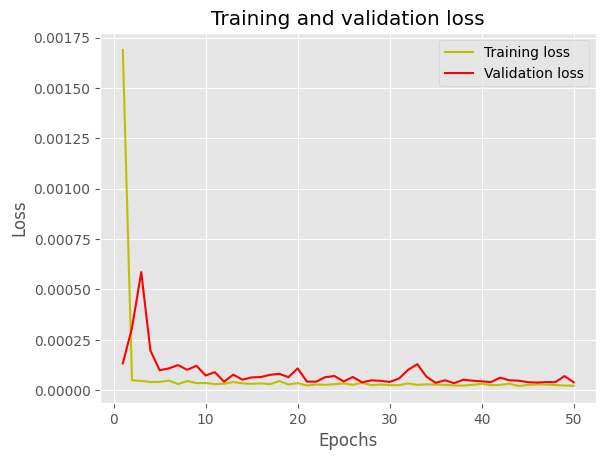

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [64]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error,  mean_squared_error
y_pred = list( Output['Predictions'])
y_target = list(Output['TargetNextClose'])

r2 = r2_score(Output['TargetNextClose'], Output['Predictions'] )
MAPE = mean_absolute_percentage_error(Output['TargetNextClose'],  Output['Predictions'])
RMSE = np.sqrt(mean_squared_error(Output['TargetNextClose'],  Output['Predictions']))

print('The error values for the model (R2, MAPE, RMSE ) are :\n', r2, MAPE, RMSE)


The error values for the model (R2, MAPE, RMSE ) are :
 0.9862879342697222 0.014043280235980664 72.91778551932552
